In [1]:
from pyforest import *

In [5]:
train = pd.read_csv("C:/Users/mukul/OneDrive/Documents/mnisttrain.csv")
test = pd.read_csv("C:/Users/mukul/OneDrive/Documents/mnisttest.csv")

<IPython.core.display.Javascript object>

In [37]:
submission = pd.read_csv("C:/Users/mukul/OneDrive/Documents/mnistsample_submission.csv")

<IPython.core.display.Javascript object>

In [6]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [7]:
train.head() # Label is the Target Variable

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


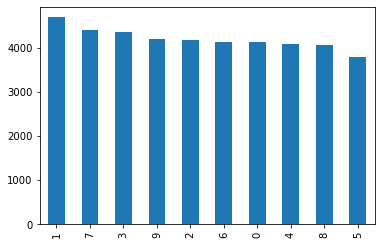

In [9]:
train.label.value_counts().plot(kind = "bar") # Most of the classes are Balanced

In [10]:
# Split the data in train and test and build a model and check the performance
from sklearn.model_selection import train_test_split
x = train.drop("label", axis = 1)
y = train.label

xtrain, xtest, ytrain,ytest = train_test_split(x,y, test_size = 0.25, random_state = 100)

In [15]:
# Importing Models
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, matthews_corrcoef

In [16]:
# Defining Models
cb = CatBoostClassifier()
rf = RandomForestClassifier()
lg = LogisticRegression()
gbm = GradientBoostingClassifier()
ada = AdaBoostClassifier()
lgbm = LGBMClassifier()
xgb = XGBClassifier()

In [18]:
# Fitting all the Models
pred_cb = cb.fit(xtrain, ytrain).predict(xtest)
pred_rf = rf.fit(xtrain, ytrain).predict(xtest)
pred_lg = lg.fit(xtrain, ytrain).predict(xtest)
pred_gbm = gbm.fit(xtrain, ytrain).predict(xtest)
pred_ada = ada.fit(xtrain, ytrain).predict(xtest)
pred_lgbm = lgbm.fit(xtrain, ytrain).predict(xtest)
pred_xgb = xgb.fit(xtrain, ytrain).predict(xtest)

Learning rate set to 0.094349
0:	learn: 2.0111597	total: 723ms	remaining: 12m 2s
1:	learn: 1.8185968	total: 1.33s	remaining: 11m 3s
2:	learn: 1.6620151	total: 1.92s	remaining: 10m 37s
3:	learn: 1.5372817	total: 2.51s	remaining: 10m 26s
4:	learn: 1.4362660	total: 3.09s	remaining: 10m 15s
5:	learn: 1.3474098	total: 3.69s	remaining: 10m 10s
6:	learn: 1.2627216	total: 4.28s	remaining: 10m 6s
7:	learn: 1.1915090	total: 4.87s	remaining: 10m 3s
8:	learn: 1.1273028	total: 5.46s	remaining: 10m 1s
9:	learn: 1.0691168	total: 6.04s	remaining: 9m 58s
10:	learn: 1.0181121	total: 6.64s	remaining: 9m 56s
11:	learn: 0.9662627	total: 7.23s	remaining: 9m 55s
12:	learn: 0.9268687	total: 7.82s	remaining: 9m 53s
13:	learn: 0.8872126	total: 8.41s	remaining: 9m 52s
14:	learn: 0.8505954	total: 8.99s	remaining: 9m 50s
15:	learn: 0.8179160	total: 9.6s	remaining: 9m 50s
16:	learn: 0.7880185	total: 10.2s	remaining: 9m 49s
17:	learn: 0.7586111	total: 10.8s	remaining: 9m 48s
18:	learn: 0.7358608	total: 11.4s	remaini

C:\Users\mukul\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# Printing the Metrics of all the Models

cols = ['Model_Name', 'Accuracy Score', 'Kappa Score', 'Matthew Correl']

# creating a empty dataframe of the colums
result_table = pd.DataFrame(columns = cols)

# Model
cbmodel = pd.Series({'Model_Name': "Catboost Model",
                     'Accuracy Score': accuracy_score(ytest, pred_cb),
                     'Kappa Score': cohen_kappa_score(ytest, pred_cb),
                     'Matthew Correl': matthews_corrcoef(ytest, pred_cb)})

GBMModel = pd.Series({'Model_Name': "GBM Model",
                     'Accuracy Score': accuracy_score(ytest, pred_gbm),
                     'Kappa Score': cohen_kappa_score(ytest, pred_gbm),
                     'Matthew Correl': matthews_corrcoef(ytest, pred_gbm)})
RFModel = pd.Series({'Model_Name': "RF Model",
                     'Accuracy Score': accuracy_score(ytest, pred_rf),
                     'Kappa Score': cohen_kappa_score(ytest, pred_rf),
                     'Matthew Correl': matthews_corrcoef(ytest, pred_rf)})
LGModel = pd.Series({'Model_Name': "LogReg Model",
                     'Accuracy Score': accuracy_score(ytest, pred_lg),
                     'Kappa Score': cohen_kappa_score(ytest, pred_lg),
                     'Matthew Correl': matthews_corrcoef(ytest, pred_lg)})
LGBMModel = pd.Series({'Model_Name': "LGBM Model",
                     'Accuracy Score': accuracy_score(ytest, pred_lgbm),
                     'Kappa Score': cohen_kappa_score(ytest, pred_lgbm),
                     'Matthew Correl': matthews_corrcoef(ytest, pred_lgbm)})
XGBModel = pd.Series({'Model_Name': "XGB Model",
                     'Accuracy Score': accuracy_score(ytest, pred_xgb),
                     'Kappa Score': cohen_kappa_score(ytest, pred_xgb),
                     'Matthew Correl': matthews_corrcoef(ytest, pred_xgb)})
ADAModel = pd.Series({'Model_Name': "ADABoost Model",
                     'Accuracy Score': accuracy_score(ytest, pred_ada),
                     'Kappa Score': cohen_kappa_score(ytest, pred_ada),
                     'Matthew Correl': matthews_corrcoef(ytest, pred_ada)})



# append the values to the result table
result_table = result_table.append(cbmodel, ignore_index = True)
result_table = result_table.append(GBMModel, ignore_index = True)
result_table = result_table.append(ADAModel, ignore_index = True)
result_table = result_table.append(RFModel, ignore_index = True)
result_table = result_table.append(LGModel, ignore_index = True)
result_table = result_table.append(LGBMModel, ignore_index = True)
result_table = result_table.append(XGBModel, ignore_index = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Model_Name,Accuracy Score,Kappa Score,Matthew Correl
0,Catboost Model,0.968190,0.964648,0.964651
1,GBM Model,0.943238,0.936917,0.936926
2,ADABoost Model,0.742476,0.713679,0.714161
3,RF Model,0.963238,0.959145,0.959150
4,LogReg Model,0.911429,0.901557,0.901603
5,LGBM Model,0.974095,0.971211,0.971214
6,XGB Model,0.973048,0.970046,0.970049


In [35]:
result_table.sort_values(by="Kappa Score", ascending=False)

,Model_Name,Accuracy Score,Kappa Score,Matthew Correl
5,LGBM Model,0.974095,0.971211,0.971214
6,XGB Model,0.973048,0.970046,0.970049
0,Catboost Model,0.968190,0.964648,0.964651
3,RF Model,0.963238,0.959145,0.959150
1,GBM Model,0.943238,0.936917,0.936926
4,LogReg Model,0.911429,0.901557,0.901603
2,ADABoost Model,0.742476,0.713679,0.714161


In [40]:
# As Kappa score and Matthew's Correlation Coefficient is very high. We will tune the model as per LGBM and make submission
lgbm1 = LGBMClassifier()

pred_lgbm = lgbm1.fit(x, y).predict(test)

solution = pd.DataFrame({'ImageId':submission.ImageId, "Label": pred_lgbm})
solution.to_csv("LGBM.csv", index = False) # Kaggle Submission Score: 0.97307 

<IPython.core.display.Javascript object>

In [39]:
cd

C:\Users\mukul
